In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Ligaw na daigdig,1962
1,Sluby ulanskie,1934
2,The House of the Seven Gables,1940
3,Mandala - Il simbolo,2008
4,Shi bian,1958


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Love                    10
She                     10
Paradise                10
Temptation              10
Kismet                  10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
titles[(titles["year"]>=1930) & (titles["year"]<1940)].title.value_counts().head(3)

Big Business            3
Temptation              3
The Three Musketeers    3
Name: title, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

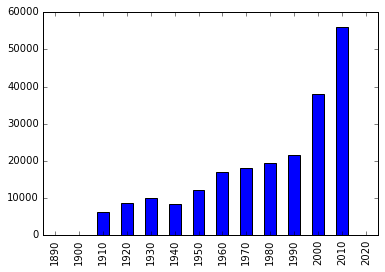

In [8]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

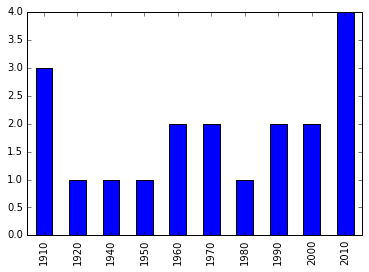

In [9]:
t = titles[titles.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

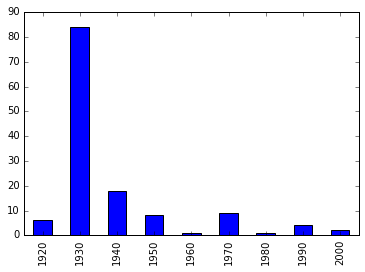

In [10]:
t = cast[cast.character == 'Rustler']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

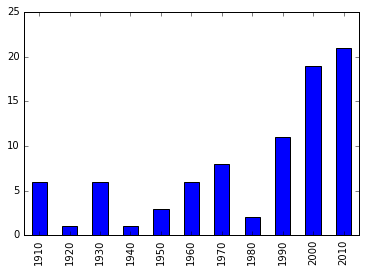

In [11]:
t = cast[cast.character == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [12]:
cast.character.value_counts().head(11)

Himself        18553
Dancer         11338
Extra           9328
Reporter        7726
Doctor          6968
Policeman       6582
Student         6534
Nurse           6236
Bartender       6203
Party Guest     6185
Minor Role      6052
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [15]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Lili?n Garc?a          8
Joan Rivers            7
Mary Jo Pehl           7
Hillary Clinton        5
Caroline Rhea          5
Rekha                  5
Juhi Chawla            5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [16]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             95
Richard Nixon            41
Ronald Reagan            32
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
George W. Bush           20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [20]:
cast[cast.year == 1945].name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [21]:
cast[cast.year == 1985].name.value_counts().head(1)

Mammootty    20
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

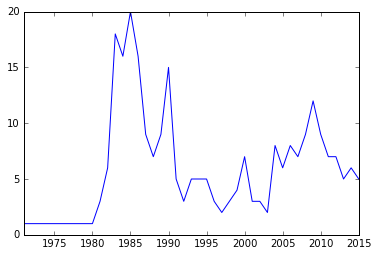

In [32]:
# (cast[cast.name == "Mammootty"].character // 1 * 1).value_counts().sort_index().plot(kind='bar')

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [36]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [38]:
cast[cast.character.str.startswith("Science")].character.head(10)

10860         Science Student
29725             Science Kid
36888         Science Student
80438            Science Monk
124653    Science Performer 3
127689        Science Teacher
136976        Science Teacher
139631        Science Teacher
167672    Science Promo Cadet
171221    Science Fair Patron
Name: character, dtype: object

### Plot the n-values of the roles that Judi Dench has played over her career.

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


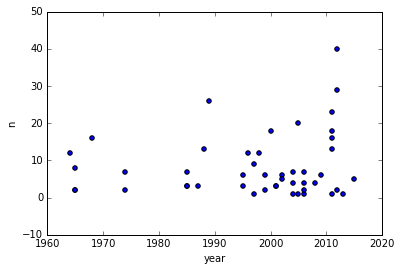

In [43]:
char = cast[cast.name == "Judi Dench"].sort("year")
char = char[char.n.notnull()]
char.plot(x="year",y ="n", kind="scatter")

### Plot the n-values of Cary Grant's roles through his career.

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


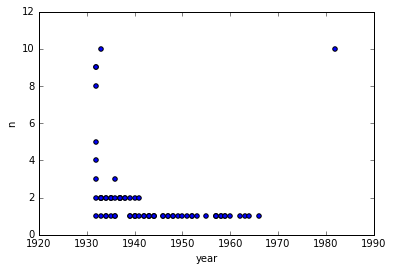

In [44]:
char = cast[cast.name == "Cary Grant"].sort("year")
char = char[char.n.notnull()]
char.plot(x="year",y ="n", kind="scatter")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

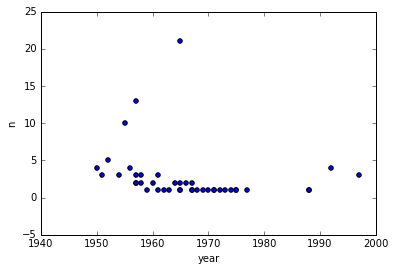

In [45]:
char = cast[cast["name"]== "Sidney Poitier"]
char = char[char.n.notnull()]
char.plot(x="year",y="n",kind="scatter")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [61]:
c = cast
c = c[c.year // 10 == 195]
c = c[(c.n == 1) ]
c.type.value_counts()


actor      6430
actress    2858
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [60]:
c = cast
c = c[c.year // 10 == 195]
c = c[(c.n == 2) ]
c.type.value_counts()

actress    4435
actor      4431
Name: type, dtype: int64